0:  0.975474811384524
1:  0.024509541105720508
2:  8.398790072735081e-06
3:  3.7996462785936324e-06
4:  1.96234736968464e-06
5:  1.4867260345095217e-06


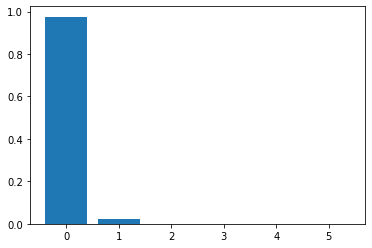

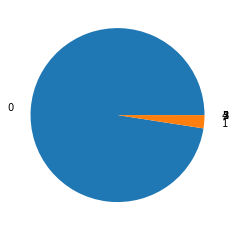

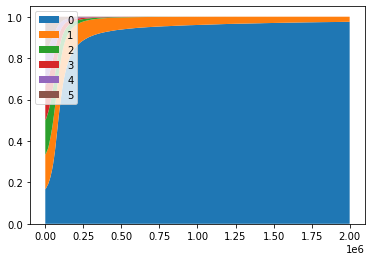

0:  0.9697550380040543
1:  0.03024420386021106
2:  3.893565054573988e-07
3:  1.7555507534014156e-07
4:  1.1155023789488085e-07
5:  8.167391588814291e-08


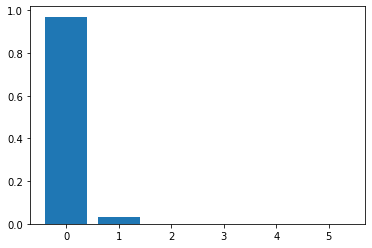

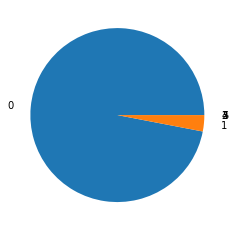

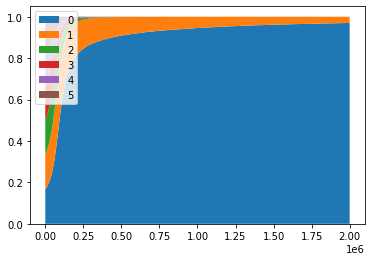

0:  0.9702523276416438
1:  0.029746974096711905
2:  3.4367822223016667e-07
3:  1.6818215883461106e-07
4:  1.1227604501955165e-07
5:  7.412521829361683e-08


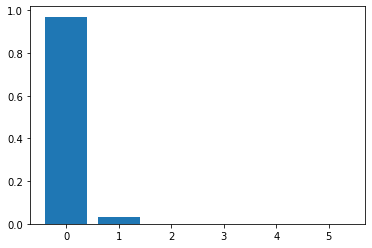

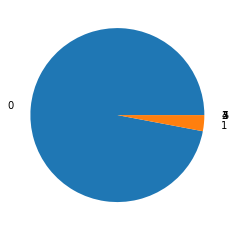

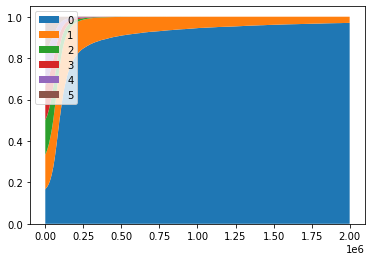

評価用--------------------
[100, 0]
要素なし


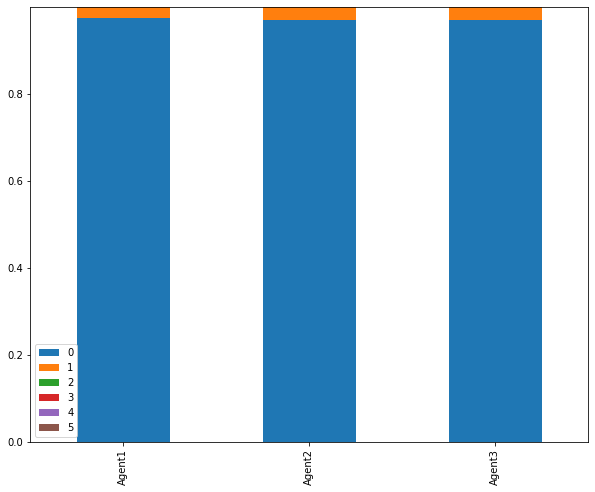

In [ ]:
#なにもしないとき
#実験 1番
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
class Dealer:
    def __init__(self):
        self.noruma = 6 #ノルマです
    def keisan(self,actions):
        koukyouzai = sum(actions) #公共財の枚数
        if koukyouzai < self.noruma: #未達成時の処理
          reward = [] #結果
          for a in actions:
            reward.append(5-a+2*koukyouzai/3)
          return reward
        else:
            reward = []
            for a in actions:
                reward.append(5-a+2*koukyouzai/3)
            return reward
class Tanzyun_Agent:
  def __init__(self):
    pass
  def acts(self):
    return 5
  def critic(self,reward):
    pass
  def decide_yusen(self):
    pass
  def decide_pi(self):
    pass
class Agent:
    def __init__(self):
        self.alpha = 0.01
        self.beta = 0.00005
        self.actions = [0,1,2,3,4,5]
        self.q_values = np.repeat(3,len(self.actions))
        self.pi = np.repeat(1/6,len(self.actions))
        self.last_action_id = None
        self.yusen = np.repeat(1/6,len(self.actions))
        self.delta = None
        self.pi_history= []
        self.yusen_history = []
        self.reward_his = []
    def acts(self):
        action_id = np.random.choice(len(self.actions),p = self.pi)
        self.last_action_id = action_id
        return action_id
    def decide_pi(self):
        self.pi_history.append(copy.deepcopy(self.pi))
        bunbo = sum([np.e**aidx for aidx in self.yusen])
        self.pi = [np.e**aidx/bunbo for aidx in self.yusen]
    def critic(self,reward):
        self.delta = reward -self.q_values[self.last_action_id]
        self.q_values[self.last_action_id] = (1-self.alpha)*self.q_values[self.last_action_id] + self.alpha*reward
    def decide_yusen(self):
        self.yusen[self.last_action_id] = self.yusen[self.last_action_id] + self.beta*self.delta*(1-self.pi[self.last_action_id])
    
    
    def shuturyoku(self):
      
        for a, _ in enumerate(self.pi):
            print(str(a)+":  " +str(self.pi[a]))
        plt.bar(x =[0,1,2,3,4,5],height = self.pi)
        plt.show()
        #積み上げ棒グラフ
        #put up your set あんたいったいどこの誰
        #円グラフを出力する
        print()
        fig,ax = plt.subplots()
        labels = ["0","1","2","3","4","5"]
        ax.pie(self.pi,labels = labels,labeldistance = 1.2)
        #オレセン
        print()
        labels = ["0","1","2","3","4","5"]
        pi0his = [self.pi_history[aidx][0] for aidx, _ in enumerate(self.pi_history)]
        pi1his = [self.pi_history[aidx][1] for aidx, _ in enumerate(self.pi_history)]
        pi2his = [self.pi_history[aidx][2] for aidx, _ in enumerate(self.pi_history)]
        pi3his = [self.pi_history[aidx][3] for aidx, _ in enumerate(self.pi_history)]
        pi4his = [self.pi_history[aidx][4] for aidx, _ in enumerate(self.pi_history)]
        pi5his = [self.pi_history[aidx][5] for aidx, _ in enumerate(self.pi_history)]
        fig,ax = plt.subplots()
        ax.stackplot(range(1,len(pi0his)+1),pi0his,pi1his,pi2his,pi3his,pi4his,pi5his,labels = labels)
        ax.legend(loc="upper left")
        plt.show()


if __name__ == "__main__":
    NB_EPISODE = 2000000
    agent1 = Agent()
    agent2 = Agent()
    agent3 = Agent()
    agents = [agent1,agent2,agent3]
    dealer = Dealer()
    for episode in range(NB_EPISODE):
        actions = [i.acts() for i in agents]
        reward = dealer.keisan(actions= actions)
        for q,_ in enumerate(agents):
            agents[q].critic(reward[q])
            agents[q].decide_yusen()
            agents[q].decide_pi()
    for t in agents:
      t.shuturyoku()
    
    #最後にそのルールを評価する
    hyouka = [0,0]
    heikin = []
    for k in range(100):
      actions = [i.acts() for i in agents]
      if sum(actions) < 6:
        hyouka[0] += 1
      else:
        if min(actions) < 2:
          hyouka[1] += 1
        else:
          heikin.append(sum(actions) -6)
    try:
      heikin_num = sum(heikin)/len(heikin)
    except ZeroDivisionError:
      heikin_num = "要素なし"
    print("評価用--------------------")
    print(hyouka)
    print(heikin_num)
    matrix = [agent1.pi,agent2.pi,agent3.pi]
    dataset = pd.DataFrame([list(x) for x in zip(*matrix)],columns=["Agent1","Agent2","Agent3"],index=["0","1","2","3","4","5"])
    fig, ax = plt.subplots(figsize=(10, 8))
    dataset.T.plot(kind='bar', stacked=True, ax=ax)
    plt.show()

0:  5.395203482542325e-38
1:  1.4249284053487897e-37
2:  9.331962442447605e-37
3:  0.9637741529733719
4:  0.036225847026628066
5:  1.8608874580189714e-36


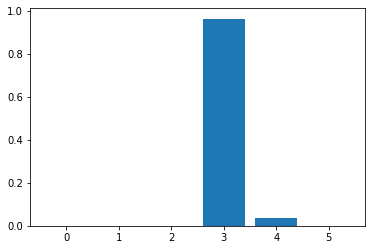

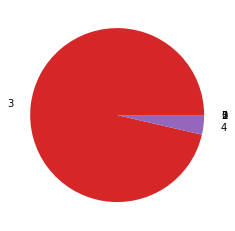

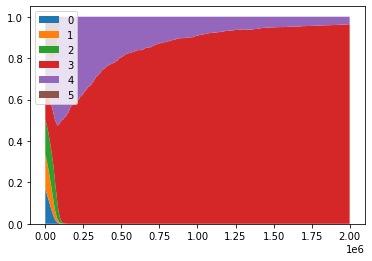

0:  1.9143995419843876e-26
1:  4.951706845728633e-26
2:  4.448839185761405e-25
3:  0.9698072583799405
4:  0.030192741620059513
5:  2.730625323321722e-25


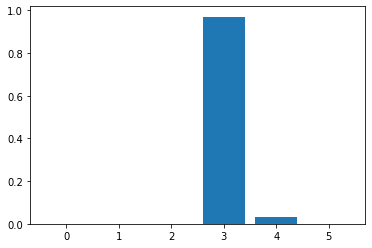

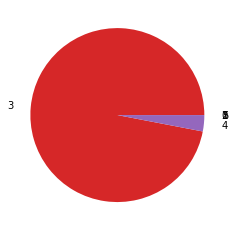

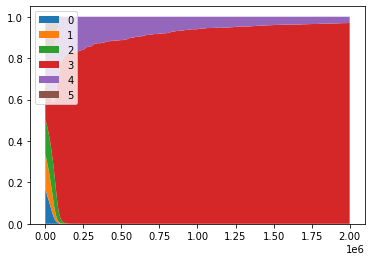

0:  2.509744053969905e-31
1:  7.295269151547496e-31
2:  2.3674987607438978e-30
3:  0.9677004625193153
4:  0.032299537480684676
5:  3.820618969835594e-30


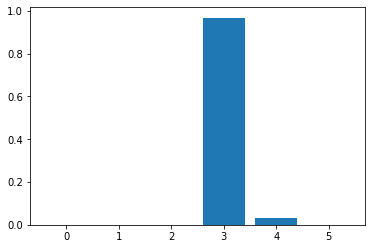

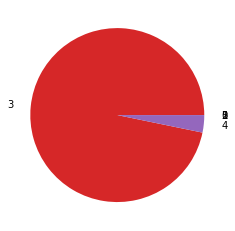

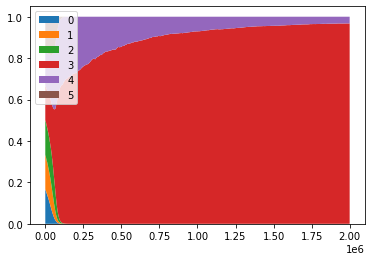

評価用--------------------
[100, 0]
要素なし


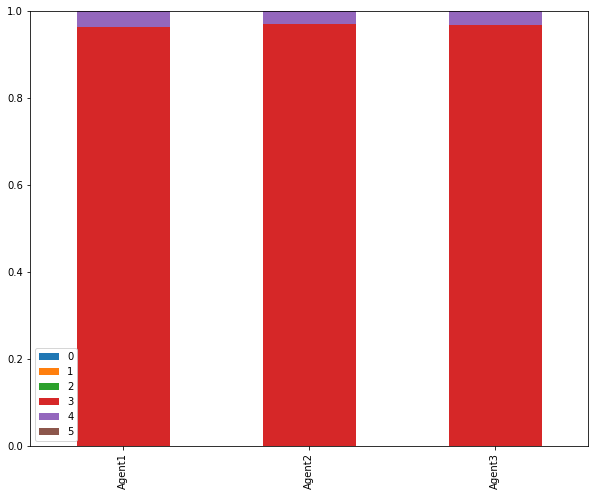

In [2]:
#原始的なノルマ型
#実験 2番
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
class Dealer:
    def __init__(self):
        self.noruma = 6 #ノルマです
    def keisan(self,actions):
        koukyouzai = sum(actions) #公共財の枚数
        if koukyouzai < self.noruma: #未達成時の処理
          reward = [] #結果
          for a in actions:
            reward.append(0)
          return reward
        else:
            reward = []
            for a in actions:
                reward.append(5-a+2*koukyouzai/3)
            return reward
class Tanzyun_Agent:
  def __init__(self):
    pass
  def acts(self):
    return 5
  def critic(self,reward):
    pass
  def decide_yusen(self):
    pass
  def decide_pi(self):
    pass
class Agent:
    def __init__(self):
        self.alpha = 0.01
        self.beta = 0.00005
        self.actions = [0,1,2,3,4,5]
        self.q_values = np.repeat(3,len(self.actions))
        self.pi = np.repeat(1/6,len(self.actions))
        self.last_action_id = None
        self.yusen = np.repeat(1/6,len(self.actions))
        self.delta = None
        self.pi_history= []
        self.yusen_history = []
        self.reward_his = []
    def acts(self):
        action_id = np.random.choice(len(self.actions),p = self.pi)
        self.last_action_id = action_id
        return action_id
    def decide_pi(self):
        self.pi_history.append(copy.deepcopy(self.pi))
        bunbo = sum([np.e**aidx for aidx in self.yusen])
        self.pi = [np.e**aidx/bunbo for aidx in self.yusen]
    def critic(self,reward):
        self.delta = reward -self.q_values[self.last_action_id]
        self.q_values[self.last_action_id] = (1-self.alpha)*self.q_values[self.last_action_id] + self.alpha*reward
    def decide_yusen(self):
        self.yusen[self.last_action_id] = self.yusen[self.last_action_id] + self.beta*self.delta*(1-self.pi[self.last_action_id])
    
    
    def shuturyoku(self):
        for a, _ in enumerate(self.pi):
            print(str(a)+":  " +str(self.pi[a]))
        plt.bar(x =[0,1,2,3,4,5],height = self.pi)
        plt.show()
        print()
        fig,ax = plt.subplots()
        labels = ["0","1","2","3","4","5"]
        ax.pie(self.pi,labels = labels,labeldistance = 1.2)
        #オレセン
        print()
        labels = ["0","1","2","3","4","5"]
        pi0his = [self.pi_history[aidx][0] for aidx, _ in enumerate(self.pi_history)]
        pi1his = [self.pi_history[aidx][1] for aidx, _ in enumerate(self.pi_history)]
        pi2his = [self.pi_history[aidx][2] for aidx, _ in enumerate(self.pi_history)]
        pi3his = [self.pi_history[aidx][3] for aidx, _ in enumerate(self.pi_history)]
        pi4his = [self.pi_history[aidx][4] for aidx, _ in enumerate(self.pi_history)]
        pi5his = [self.pi_history[aidx][5] for aidx, _ in enumerate(self.pi_history)]
        fig,ax = plt.subplots()
        ax.stackplot(range(1,len(pi0his)+1),pi0his,pi1his,pi2his,pi3his,pi4his,pi5his,labels = labels)
        ax.legend(loc="upper left")
        plt.show()


if __name__ == "__main__":
    NB_EPISODE = 2000000
    agent1 = Agent()
    agent2 = Agent()
    agent3 = Agent()
    agents = [agent1,agent2,agent3]
    dealer = Dealer()
    for episode in range(NB_EPISODE):
        actions = [i.acts() for i in agents]
        reward = dealer.keisan(actions= actions)
        for q,_ in enumerate(agents):
            agents[q].critic(reward[q])
            agents[q].decide_yusen()
            agents[q].decide_pi()
    for t in agents:
      t.shuturyoku()
    
    #最後にそのルールを評価する
    hyouka = [0,0]
    heikin = []
    for k in range(100):
      actions = [i.acts() for i in agents]
      if sum(actions) < 12:
        hyouka[0] += 1
      else:
        if min(actions) < 4:
          hyouka[1] += 1
        else:
          heikin.append(sum(actions) -12)
    try:
      heikin_num = sum(heikin)/len(heikin)
    except ZeroDivisionError:
      heikin_num = "要素なし"
    print("評価用--------------------")
    print(hyouka)
    print(heikin_num)
    matrix = [agent1.pi,agent2.pi,agent3.pi]
    dataset = pd.DataFrame([list(x) for x in zip(*matrix)],columns=["Agent1","Agent2","Agent3"],index=["0","1","2","3","4","5"])
    fig, ax = plt.subplots(figsize=(10, 8))
    dataset.T.plot(kind='bar', stacked=True, ax=ax)
    plt.show()

0:  1.3982040667018295e-28
1:  2.2651516058281744e-28
2:  3.5337225114756865e-28
3:  3.2260112724238684e-28
4:  0.9650357209418042
5:  0.03496427905819585


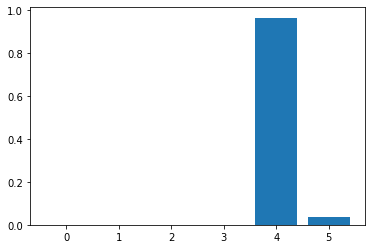

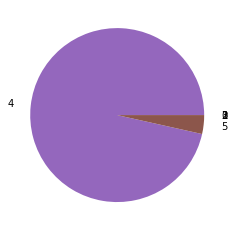

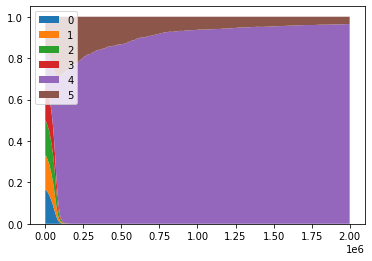

0:  2.637312256801839e-19
1:  5.40414318833739e-19
2:  8.236254427133141e-19
3:  7.516788183753174e-19
4:  0.9747768544875394
5:  0.025223145512460618


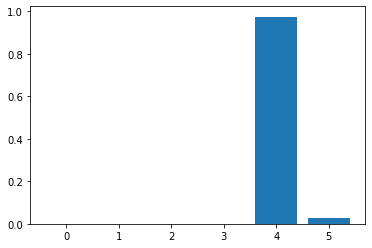

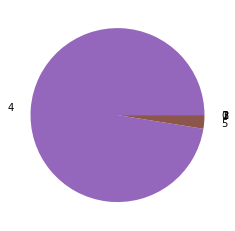

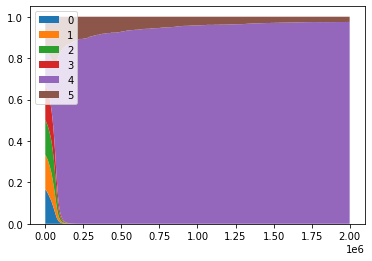

0:  4.533495431727976e-27
1:  6.343051339488153e-27
2:  1.4653056940209034e-26
3:  1.0900023719664468e-26
4:  0.9701801588314509
5:  0.029819841168549098


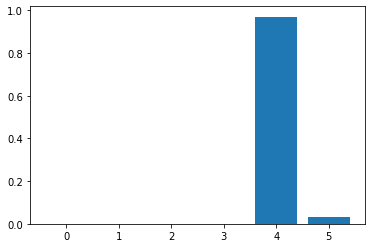

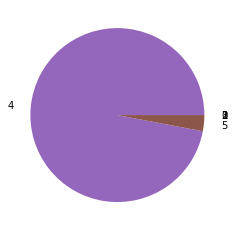

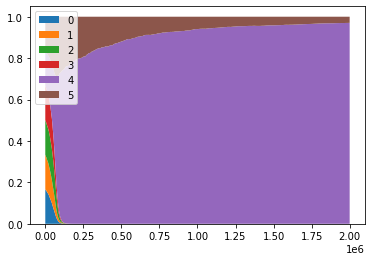

評価用--------------------
[0, 0]
6.08


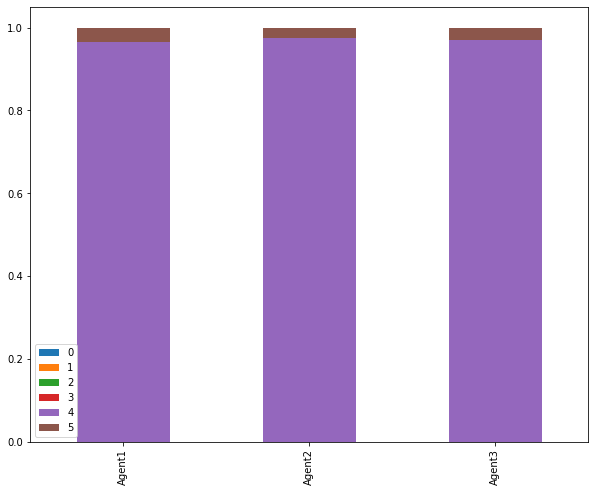

In [ ]:
#半分プレゼント
#実験 3番
import numpy as np
import copy
import matplotlib.pyplot as plt
class Dealer:
    def __init__(self):
        self.noruma = 6 #ノルマです
    def keisan(self,actions):
        koukyouzai = sum(actions) #公共財の枚数
        if koukyouzai < self.noruma: #未達成時の処理
          reward = [] #結果
          for a in actions:
            reward.append((5-a+2*koukyouzai/3)/2)
          return reward
        else:
            reward = []
            for a in actions:
                reward.append(5-a+2*koukyouzai/3)
            return reward
class Tanzyun_Agent:
  def __init__(self):
    pass
  def acts(self):
    return 5
  def critic(self,reward):
    pass
  def decide_yusen(self):
    pass
  def decide_pi(self):
    pass
class Agent:
    def __init__(self):
        self.alpha = 0.01
        self.beta = 0.00005
        self.actions = [0,1,2,3,4,5]
        self.q_values = np.repeat(2,len(self.actions))
        self.pi = np.repeat(1/6,len(self.actions))
        self.last_action_id = None
        self.yusen = np.repeat(1/6,len(self.actions))
        self.delta = None
        self.pi_history= []
        self.yusen_history = []
        self.reward_his = []
    def acts(self):
        action_id = np.random.choice(len(self.actions),p = self.pi)
        self.last_action_id = action_id
        return action_id
    def decide_pi(self):
        self.pi_history.append(copy.deepcopy(self.pi))
        bunbo = sum([np.e**aidx for aidx in self.yusen])
        self.pi = [np.e**aidx/bunbo for aidx in self.yusen]
    def critic(self,reward):
        self.delta = reward -self.q_values[self.last_action_id]
        self.q_values[self.last_action_id] = (1-self.alpha)*self.q_values[self.last_action_id] + self.alpha*reward
    def decide_yusen(self):
        self.yusen[self.last_action_id] = self.yusen[self.last_action_id] + self.beta*self.delta*(1-self.pi[self.last_action_id])
    
    
    def shuturyoku(self):
        for a, _ in enumerate(self.pi):
            print(str(a)+":  " +str(self.pi[a]))
        plt.bar(x =[0,1,2,3,4,5],height = self.pi)
        plt.show()
        print()
        fig,ax = plt.subplots()
        labels = ["0","1","2","3","4","5"]
        ax.pie(self.pi,labels = labels,labeldistance = 1.2)
        #オレセン
        print()
        labels = ["0","1","2","3","4","5"]
        pi0his = [self.pi_history[aidx][0] for aidx, _ in enumerate(self.pi_history)]
        pi1his = [self.pi_history[aidx][1] for aidx, _ in enumerate(self.pi_history)]
        pi2his = [self.pi_history[aidx][2] for aidx, _ in enumerate(self.pi_history)]
        pi3his = [self.pi_history[aidx][3] for aidx, _ in enumerate(self.pi_history)]
        pi4his = [self.pi_history[aidx][4] for aidx, _ in enumerate(self.pi_history)]
        pi5his = [self.pi_history[aidx][5] for aidx, _ in enumerate(self.pi_history)]
        fig,ax = plt.subplots()
        ax.stackplot(range(1,len(pi0his)+1),pi0his,pi1his,pi2his,pi3his,pi4his,pi5his,labels = labels)
        ax.legend(loc="upper left")
        plt.show()


if __name__ == "__main__":
    NB_EPISODE = 2000000
    agent1 = Agent()
    agent2 = Agent()
    agent3 = Agent()
    agents = [agent1,agent2,agent3]
    dealer = Dealer()
    for episode in range(NB_EPISODE):
        actions = [i.acts() for i in agents]
        reward = dealer.keisan(actions= actions)
        for q,_ in enumerate(agents):
            agents[q].critic(reward[q])
            agents[q].decide_yusen()
            agents[q].decide_pi()
    for t in agents:
      t.shuturyoku()
    
    #最後にそのルールを評価する
    hyouka = [0,0]
    heikin = []
    for k in range(100):
      actions = [i.acts() for i in agents]
      if sum(actions) < 6:
        hyouka[0] += 1
      else:
        if min(actions) < 2:
          hyouka[1] += 1
        else:
          heikin.append(sum(actions) -6)
    try:
      heikin_num = sum(heikin)/len(heikin)
    except ZeroDivisionError:
      heikin_num = "要素なし"
    print("評価用--------------------")
    print(hyouka)
    print(heikin_num)
    matrix = [agent1.pi,agent2.pi,agent3.pi]
    dataset = pd.DataFrame([list(x) for x in zip(*matrix)],columns=["Agent1","Agent2","Agent3"],index=["0","1","2","3","4","5"])
    fig, ax = plt.subplots(figsize=(10, 8))
    dataset.T.plot(kind='bar', stacked=True, ax=ax)
    plt.show()

0:  2.5049578099470224e-09
1:  2.6338152564829094e-09
2:  1.8929656339754984e-09
3:  1.4542523882444747e-09
4:  0.010021927617125856
5:  0.989978063896883


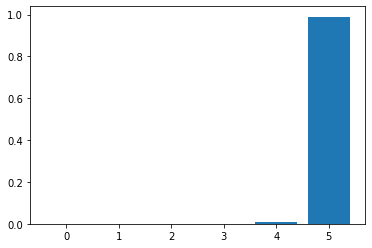

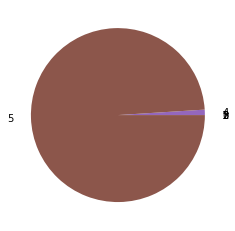

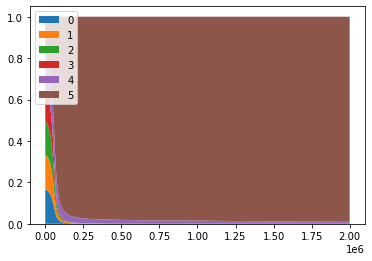

0:  3.424000715925873e-11
1:  3.483040059799836e-11
2:  2.5883839034998553e-11
3:  2.949762927544188e-11
4:  0.011294207835369122
5:  0.9887057920401789


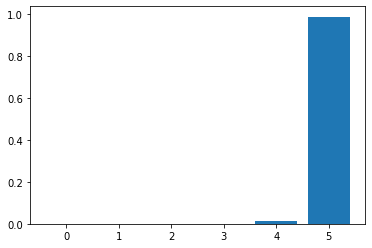

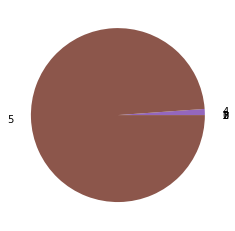

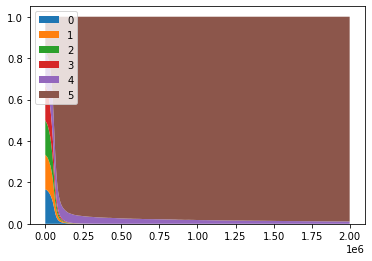

0:  1.7611589534191536e-09
1:  1.705424464589217e-09
2:  1.3781571080189085e-09
3:  1.123770416849788e-09
4:  0.009668645760165058
5:  0.9903313482713241


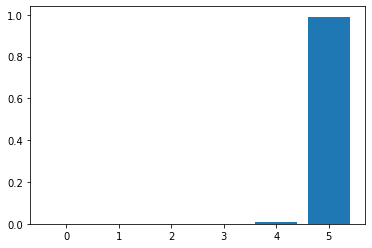

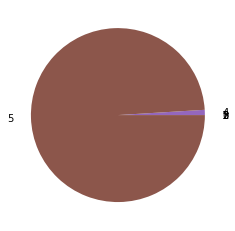

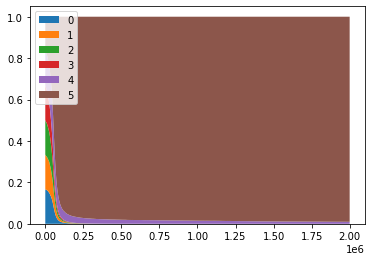

評価用--------------------
[0, 0]
8.98


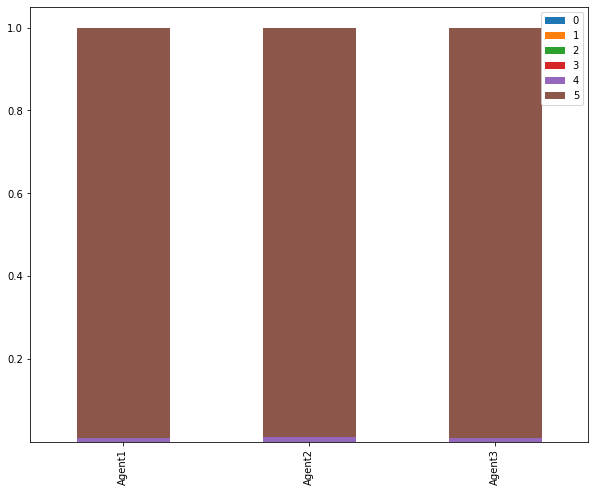

In [ ]:
#配分ゼロ
#実験 4番
import numpy as np
import copy
import matplotlib.pyplot as plt
class Dealer:
    def __init__(self):
        self.noruma = 6 #ノルマです
    def keisan(self,actions):
        koukyouzai = sum(actions) #公共財の枚数
        if koukyouzai < self.noruma: #未達成時の処理
          reward = [] #結果
          for a in actions:
            reward.append(5-a)
          return reward
        else:
            reward = []
            for a in actions:
                reward.append(5-a+2*koukyouzai/3)
            return reward
class Tanzyun_Agent:
  def __init__(self):
    pass
  def acts(self):
    return 5
  def critic(self,reward):
    pass
  def decide_yusen(self):
    pass
  def decide_pi(self):
    pass
class Agent:
    def __init__(self):
        self.alpha = 0.01
        self.beta = 0.00005
        self.actions = [0,1,2,3,4,5]
        self.q_values = np.repeat(2,len(self.actions))
        self.pi = np.repeat(1/6,len(self.actions))
        self.last_action_id = None
        self.yusen = np.repeat(1/6,len(self.actions))
        self.delta = None
        self.pi_history= []
        self.yusen_history = []
        self.reward_his = []
    def acts(self):
        action_id = np.random.choice(len(self.actions),p = self.pi)
        self.last_action_id = action_id
        return action_id
    def decide_pi(self):
        self.pi_history.append(copy.deepcopy(self.pi))
        bunbo = sum([np.e**aidx for aidx in self.yusen])
        self.pi = [np.e**aidx/bunbo for aidx in self.yusen]
    def critic(self,reward):
        self.delta = reward -self.q_values[self.last_action_id]
        self.q_values[self.last_action_id] = (1-self.alpha)*self.q_values[self.last_action_id] + self.alpha*reward
    def decide_yusen(self):
        self.yusen[self.last_action_id] = self.yusen[self.last_action_id] + self.beta*self.delta*(1-self.pi[self.last_action_id])
    
    
    def shuturyoku(self):
        for a, _ in enumerate(self.pi):
            print(str(a)+":  " +str(self.pi[a]))
        plt.bar(x =[0,1,2,3,4,5],height = self.pi)
        plt.show()
        print()
        fig,ax = plt.subplots()
        labels = ["0","1","2","3","4","5"]
        ax.pie(self.pi,labels = labels,labeldistance = 1.2)
        #オレセン
        print()
        labels = ["0","1","2","3","4","5"]
        pi0his = [self.pi_history[aidx][0] for aidx, _ in enumerate(self.pi_history)]
        pi1his = [self.pi_history[aidx][1] for aidx, _ in enumerate(self.pi_history)]
        pi2his = [self.pi_history[aidx][2] for aidx, _ in enumerate(self.pi_history)]
        pi3his = [self.pi_history[aidx][3] for aidx, _ in enumerate(self.pi_history)]
        pi4his = [self.pi_history[aidx][4] for aidx, _ in enumerate(self.pi_history)]
        pi5his = [self.pi_history[aidx][5] for aidx, _ in enumerate(self.pi_history)]
        fig,ax = plt.subplots()
        ax.stackplot(range(1,len(pi0his)+1),pi0his,pi1his,pi2his,pi3his,pi4his,pi5his,labels = labels)
        ax.legend(loc="upper left")
        plt.show()


if __name__ == "__main__":
    NB_EPISODE = 2000000
    agent1 = Agent()
    agent2 = Agent()
    agent3 = Agent()
    agents = [agent1,agent2,agent3]
    dealer = Dealer()
    for episode in range(NB_EPISODE):
        actions = [i.acts() for i in agents]
        reward = dealer.keisan(actions= actions)
        for q,_ in enumerate(agents):
            agents[q].critic(reward[q])
            agents[q].decide_yusen()
            agents[q].decide_pi()
    for t in agents:
      t.shuturyoku()
    
    #最後にそのルールを評価する
    hyouka = [0,0]
    heikin = []
    for k in range(100):
      actions = [i.acts() for i in agents]
      if sum(actions) < 6:
        hyouka[0] += 1
      else:
        if min(actions) < 2:
          hyouka[1] += 1
        else:
          heikin.append(sum(actions) -6)
    try:
      heikin_num = sum(heikin)/len(heikin)
    except ZeroDivisionError:
      heikin_num = "要素なし"
    print("評価用--------------------")
    print(hyouka)
    print(heikin_num)
    matrix = [agent1.pi,agent2.pi,agent3.pi]
    dataset = pd.DataFrame([list(x) for x in zip(*matrix)],columns=["Agent1","Agent2","Agent3"],index=["0","1","2","3","4","5"])
    fig, ax = plt.subplots(figsize=(10, 8))
    dataset.T.plot(kind='bar', stacked=True, ax=ax)
    plt.show()

0:  4.088696825178381e-14
1:  2.4877337342736e-15
2:  0.009305139960291349
3:  0.9906948600396641
4:  7.443932089255837e-16
5:  3.294518554574029e-16


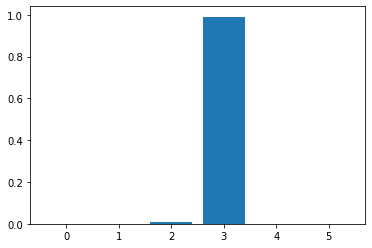

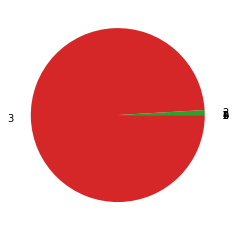

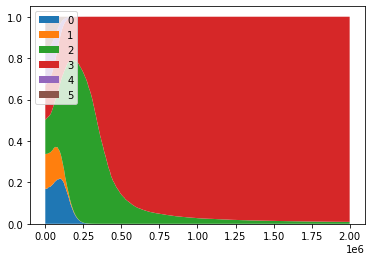

0:  3.480632227651925e-15
1:  0.007750165460932141
2:  0.9922498345390617
3:  1.1650979152312484e-15
4:  1.200666251044787e-15
5:  2.998558188469904e-16


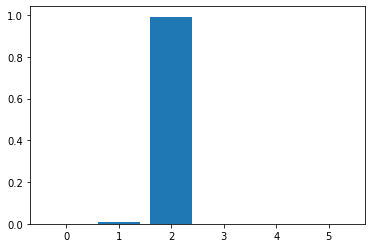

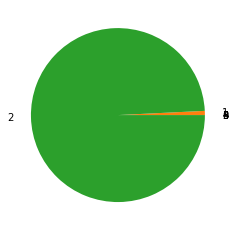

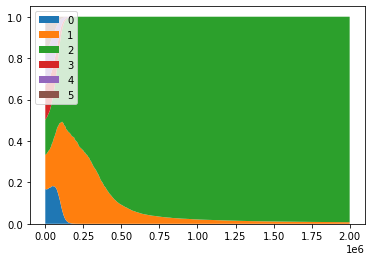

0:  1.2399471692896803e-23
1:  0.9563378186598239
2:  0.04366218134017608
3:  9.367881694540426e-23
4:  9.467336262156934e-24
5:  2.5205821504715787e-24


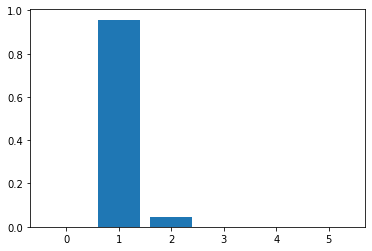

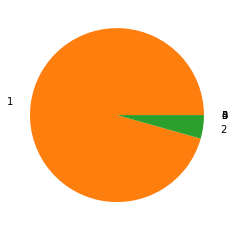

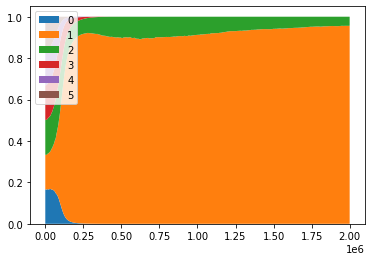

評価用--------------------
[2, 95]
1.0


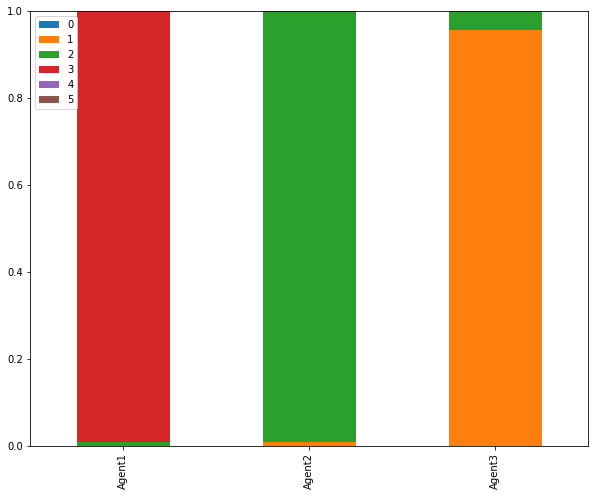

In [ ]:
#確率つきでの没収
#実験5番
import numpy as np
import copy
import matplotlib.pyplot as plt
class Dealer:
    def __init__(self):
        self.noruma = 6 #ノルマです
        self.kakuritsu = 
    def keisan(self,actions):
        koukyouzai = sum(actions) #公共財の枚数
        if np.random.random() <= self.kakuritsu and koukyouzai < self.noruma: #未達成時の処理
          reward = [] #結果
          for a in actions:
            reward.append(0)
          return reward
        else:
            reward = []
            for a in actions:
                reward.append(5-a+2*koukyouzai/3)
            return reward
class Tanzyun_Agent:
  def __init__(self):
    pass
  def acts(self):
    return 5
  def critic(self,reward):
    pass
  def decide_yusen(self):
    pass
  def decide_pi(self):
    pass
class Agent:
    def __init__(self):
        self.alpha = 0.01
        self.beta = 0.00005
        self.actions = [0,1,2,3,4,5]
        self.q_values = np.repeat(2,len(self.actions))
        self.pi = np.repeat(1/6,len(self.actions))
        self.last_action_id = None
        self.yusen = np.repeat(1/6,len(self.actions))
        self.delta = None
        self.pi_history= []
        self.yusen_history = []
        self.reward_his = []
    def acts(self):
        action_id = np.random.choice(len(self.actions),p = self.pi)
        self.last_action_id = action_id
        return action_id
    def decide_pi(self):
        self.pi_history.append(copy.deepcopy(self.pi))
        bunbo = sum([np.e**aidx for aidx in self.yusen])
        self.pi = [np.e**aidx/bunbo for aidx in self.yusen]
    def critic(self,reward):
        self.delta = reward -self.q_values[self.last_action_id]
        self.q_values[self.last_action_id] = (1-self.alpha)*self.q_values[self.last_action_id] + self.alpha*reward
    def decide_yusen(self):
        self.yusen[self.last_action_id] = self.yusen[self.last_action_id] + self.beta*self.delta*(1-self.pi[self.last_action_id])
    
    
    def shuturyoku(self):
        for a, _ in enumerate(self.pi):
            print(str(a)+":  " +str(self.pi[a]))
        plt.bar(x =[0,1,2,3,4,5],height = self.pi)
        plt.show()
        #オレセン
        print()
        fig,ax = plt.subplots()
        labels = ["0","1","2","3","4","5"]
        ax.pie(self.pi,labels = labels,labeldistance = 1.2)
        print()
        labels = ["0","1","2","3","4","5"]
        pi0his = [self.pi_history[aidx][0] for aidx, _ in enumerate(self.pi_history)]
        pi1his = [self.pi_history[aidx][1] for aidx, _ in enumerate(self.pi_history)]
        pi2his = [self.pi_history[aidx][2] for aidx, _ in enumerate(self.pi_history)]
        pi3his = [self.pi_history[aidx][3] for aidx, _ in enumerate(self.pi_history)]
        pi4his = [self.pi_history[aidx][4] for aidx, _ in enumerate(self.pi_history)]
        pi5his = [self.pi_history[aidx][5] for aidx, _ in enumerate(self.pi_history)]
        fig,ax = plt.subplots()
        ax.stackplot(range(1,len(pi0his)+1),pi0his,pi1his,pi2his,pi3his,pi4his,pi5his,labels = labels)
        ax.legend(loc="upper left")
        plt.show()


if __name__ == "__main__":
    NB_EPISODE = 2000000
    agent1 = Agent()
    agent2 = Agent()
    agent3 = Agent()
    agents = [agent1,agent2,agent3]
    dealer = Dealer()
    for episode in range(NB_EPISODE):
        actions = [i.acts() for i in agents]
        reward = dealer.keisan(actions= actions)
        for q,_ in enumerate(agents):
            agents[q].critic(reward[q])
            agents[q].decide_yusen()
            agents[q].decide_pi()
    for t in agents:
      t.shuturyoku()
    
    #最後にそのルールを評価する
    hyouka = [0,0]
    heikin = []
    for k in range(100):
      actions = [i.acts() for i in agents]
      if sum(actions) < 6:
        hyouka[0] += 1
      else:
        if min(actions) < 2:
          hyouka[1] += 1
        else:
          heikin.append(sum(actions) -6)
    try:
      heikin_num = sum(heikin)/len(heikin)
    except ZeroDivisionError:
      heikin_num = "要素なし"
    print("評価用--------------------")
    print(hyouka)
    print(heikin_num)
    matrix = [agent1.pi,agent2.pi,agent3.pi]
    dataset = pd.DataFrame([list(x) for x in zip(*matrix)],columns=["Agent1","Agent2","Agent3"],index=["0","1","2","3","4","5"])
    fig, ax = plt.subplots(figsize=(10, 8))
    dataset.T.plot(kind='bar', stacked=True, ax=ax)
    plt.show()


0:  0.8637976051367149
1:  0.1362023943144335
2:  3.1200523106071794e-10
3:  1.2532812767166673e-10
4:  7.098101536564438e-11
5:  4.053726102399187e-11


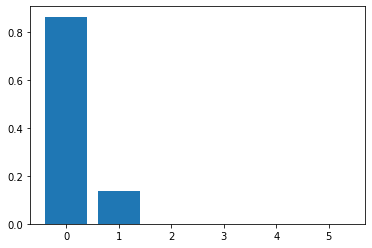

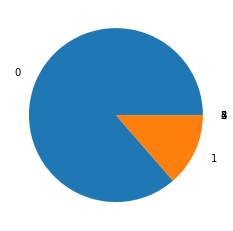

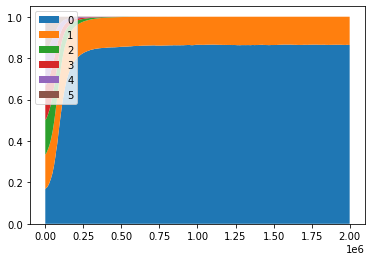

0:  0.7633471540730484
1:  0.2366528459266242
2:  2.108040354448156e-13
3:  6.994237483905854e-14
4:  2.944101620248208e-14
5:  1.7126105778586884e-14


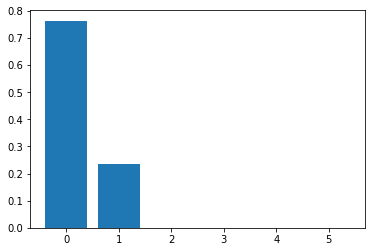

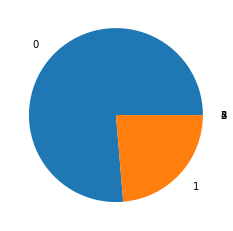

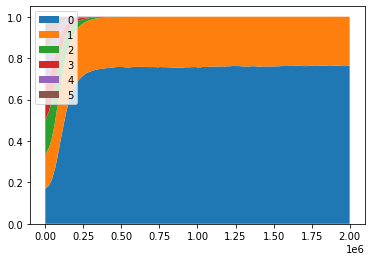

0:  0.5639161530288489
1:  0.43608384697114805
2:  2.1122452803615752e-15
3:  4.003030793250757e-16
4:  3.0687394402602285e-16
5:  1.6683375620303327e-16


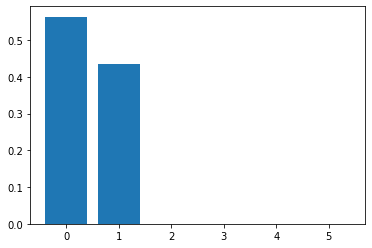

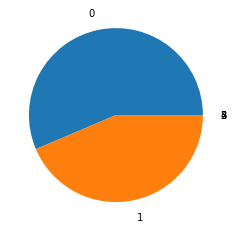

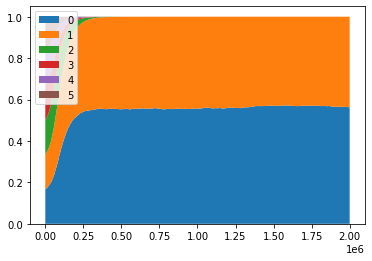

評価用--------------------
[100, 0]
要素なし


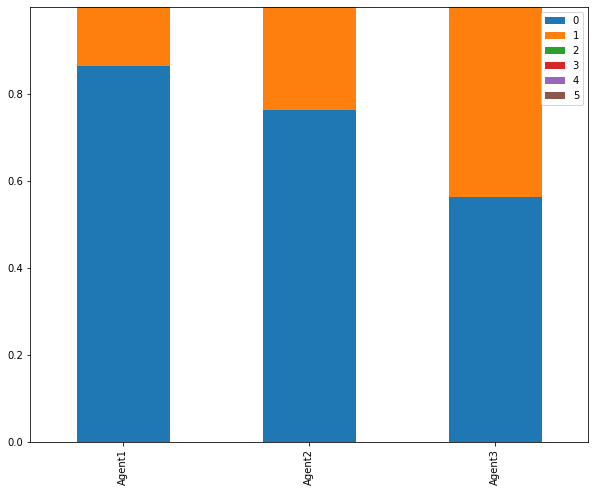

In [ ]:
#ノルマに足りなかった分の没収
#実験 6番A型
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
class Dealer:
    def __init__(self):
        self.noruma = 6 #ノルマです
    def keisan(self,actions):
        koukyouzai = sum(actions) #公共財の枚数
        if  koukyouzai < self.noruma: #未達成時の処理
          reward = [] #結果
          for a in actions:
            reward.append(5-a+2*koukyouzai/3-(6-koukyouzai)/3)
          return reward
        else:
            reward = []
            for a in actions:
                reward.append(5-a+2*koukyouzai/3)
            return reward
class Tanzyun_Agent:
  def __init__(self):
    pass
  def acts(self):
    return 5
  def critic(self,reward):
    pass
  def decide_yusen(self):
    pass
  def decide_pi(self):
    pass
class Agent:
    def __init__(self):
        self.alpha = 0.01
        self.beta = 0.00005
        self.actions = [0,1,2,3,4,5]
        self.q_values = np.repeat(2,len(self.actions))
        self.pi = np.repeat(1/6,len(self.actions))
        self.last_action_id = None
        self.yusen = np.repeat(1/6,len(self.actions))
        self.delta = None
        self.pi_history= []
        self.yusen_history = []
        self.reward_his = []
    def acts(self):
        action_id = np.random.choice(len(self.actions),p = self.pi)
        self.last_action_id = action_id
        return action_id
    def decide_pi(self):
        self.pi_history.append(copy.deepcopy(self.pi))
        bunbo = sum([np.e**aidx for aidx in self.yusen])
        self.pi = [np.e**aidx/bunbo for aidx in self.yusen]
    def critic(self,reward):
        self.delta = reward -self.q_values[self.last_action_id]
        self.q_values[self.last_action_id] = (1-self.alpha)*self.q_values[self.last_action_id] + self.alpha*reward
    def decide_yusen(self):
        self.yusen[self.last_action_id] = self.yusen[self.last_action_id] + self.beta*self.delta*(1-self.pi[self.last_action_id])
    
    
    def shuturyoku(self):
        for a, _ in enumerate(self.pi):
            print(str(a)+":  " +str(self.pi[a]))
        plt.bar(x =[0,1,2,3,4,5],height = self.pi)
        plt.show()
        #オレセン
        print()
        fig,ax = plt.subplots()
        labels = ["0","1","2","3","4","5"]
        ax.pie(self.pi,labels = labels,labeldistance = 1.2)
        print()
        labels = ["0","1","2","3","4","5"]
        pi0his = [self.pi_history[aidx][0] for aidx, _ in enumerate(self.pi_history)]
        pi1his = [self.pi_history[aidx][1] for aidx, _ in enumerate(self.pi_history)]
        pi2his = [self.pi_history[aidx][2] for aidx, _ in enumerate(self.pi_history)]
        pi3his = [self.pi_history[aidx][3] for aidx, _ in enumerate(self.pi_history)]
        pi4his = [self.pi_history[aidx][4] for aidx, _ in enumerate(self.pi_history)]
        pi5his = [self.pi_history[aidx][5] for aidx, _ in enumerate(self.pi_history)]
        fig,ax = plt.subplots()
        ax.stackplot(range(1,len(pi0his)+1),pi0his,pi1his,pi2his,pi3his,pi4his,pi5his,labels = labels)
        ax.legend(loc="upper left")
        plt.show()


if __name__ == "__main__":
    NB_EPISODE = 2000000
    agent1 = Agent()
    agent2 = Agent()
    agent3 = Agent()
    agents = [agent1,agent2,agent3]
    dealer = Dealer()
    for episode in range(NB_EPISODE):
        actions = [i.acts() for i in agents]
        reward = dealer.keisan(actions= actions)
        for q,_ in enumerate(agents):
            agents[q].critic(reward[q])
            agents[q].decide_yusen()
            agents[q].decide_pi()
    for t in agents:
      t.shuturyoku()
    
    #最後にそのルールを評価する
    hyouka = [0,0]
    heikin = []
    for k in range(100):
      actions = [i.acts() for i in agents]
      if sum(actions) < 6:
        hyouka[0] += 1
      else:
        if min(actions) < 2:
          hyouka[1] += 1
        else:
          heikin.append(sum(actions) -6)
    try:
      heikin_num = sum(heikin)/len(heikin)
    except ZeroDivisionError:
      heikin_num = "要素なし"
    print("評価用--------------------")
    print(hyouka)
    print(heikin_num)
    matrix = [agent1.pi,agent2.pi,agent3.pi]
    dataset = pd.DataFrame([list(x) for x in zip(*matrix)],columns=["Agent1","Agent2","Agent3"],index=["0","1","2","3","4","5"])
    fig, ax = plt.subplots(figsize=(10, 8))
    dataset.T.plot(kind='bar', stacked=True, ax=ax)
    plt.show()

0:  2.8148256087386966e-16
1:  0.017392414076660256
2:  0.9826075859233395
3:  6.255913511096296e-17
4:  5.560892580333516e-17
5:  1.8401580950343586e-17


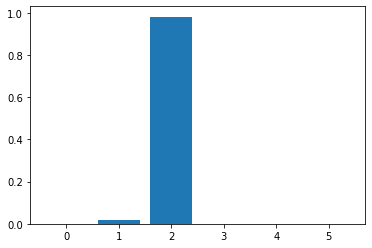

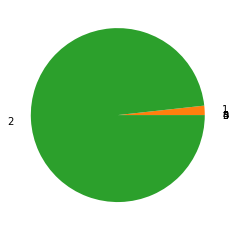

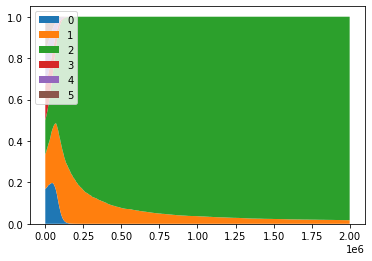

0:  3.4849369558500066e-15
1:  0.016581169227822545
2:  0.9834188307721711
3:  1.325099216261261e-15
4:  1.2139094175855493e-15
5:  4.0883061721639146e-16


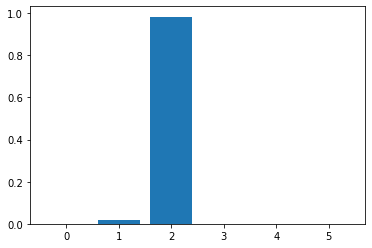

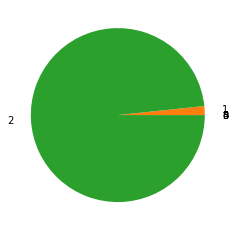

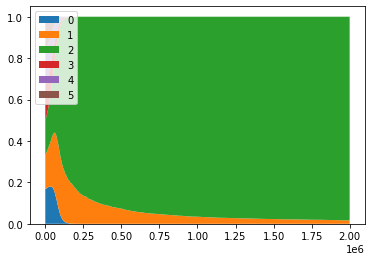

0:  7.612915410530028e-14
1:  0.01625588644708154
2:  0.9837441135527698
3:  3.2053127325700225e-14
4:  3.024038363402141e-14
5:  1.0242940037484567e-14


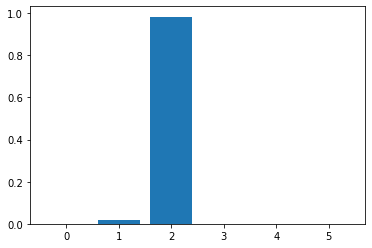

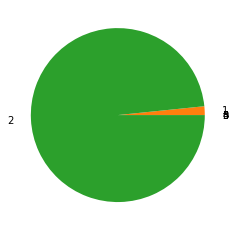

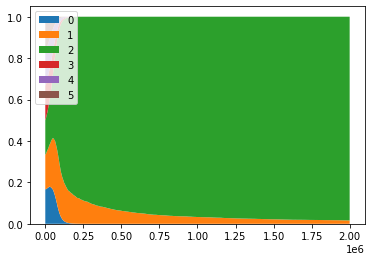

評価用--------------------
[4, 0]
0.0


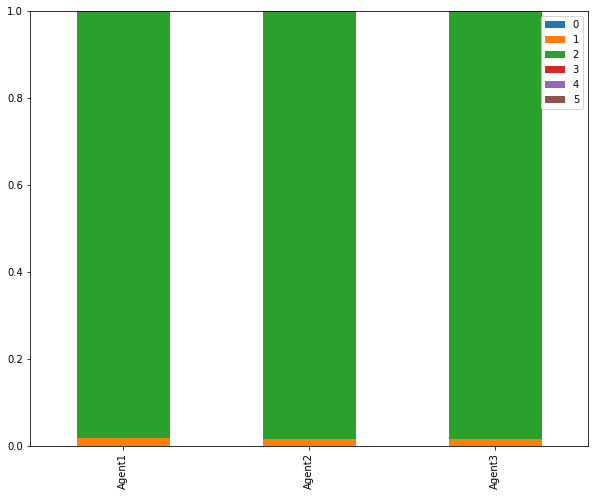

In [ ]:
#ノルマに足りなかった分の没収
#実験 6番B型
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
class Dealer:
    def __init__(self):
        self.noruma = 6 #ノルマです
    def keisan(self,actions):
        koukyouzai = sum(actions) #公共財の枚数
        if  koukyouzai < self.noruma: #未達成時の処理
          reward = [] #結果
          for a in actions:
            reward.append(5-a+2*koukyouzai/3-(6-koukyouzai))
          return reward
        else:
            reward = []
            for a in actions:
                reward.append(5-a+2*koukyouzai/3)
            return reward
class Tanzyun_Agent:
  def __init__(self):
    pass
  def acts(self):
    return 5
  def critic(self,reward):
    pass
  def decide_yusen(self):
    pass
  def decide_pi(self):
    pass
class Agent:
    def __init__(self):
        self.alpha = 0.01
        self.beta = 0.00005
        self.actions = [0,1,2,3,4,5]
        self.q_values = np.repeat(2,len(self.actions))
        self.pi = np.repeat(1/6,len(self.actions))
        self.last_action_id = None
        self.yusen = np.repeat(1/6,len(self.actions))
        self.delta = None
        self.pi_history= []
        self.yusen_history = []
        self.reward_his = []
    def acts(self):
        action_id = np.random.choice(len(self.actions),p = self.pi)
        self.last_action_id = action_id
        return action_id
    def decide_pi(self): 
        self.pi_history.append(copy.deepcopy(self.pi))
        bunbo = sum([np.e**aidx for aidx in self.yusen])
        self.pi = [np.e**aidx/bunbo for aidx in self.yusen]
    def critic(self,reward):
        self.delta = reward -self.q_values[self.last_action_id]
        self.q_values[self.last_action_id] = (1-self.alpha)*self.q_values[self.last_action_id] + self.alpha*reward
    def decide_yusen(self):
        self.yusen[self.last_action_id] = self.yusen[self.last_action_id] + self.beta*self.delta*(1-self.pi[self.last_action_id])
    
    
    def shuturyoku(self):
        for a, _ in enumerate(self.pi):
            print(str(a)+":  " +str(self.pi[a]))
        plt.bar(x =[0,1,2,3,4,5],height = self.pi)
        plt.show()
        #オレセン
        print()
        fig,ax = plt.subplots()
        labels = ["0","1","2","3","4","5"]
        ax.pie(self.pi,labels = labels,labeldistance = 1.2)
        print()
        labels = ["0","1","2","3","4","5"]
        pi0his = [self.pi_history[aidx][0] for aidx, _ in enumerate(self.pi_history)]
        pi1his = [self.pi_history[aidx][1] for aidx, _ in enumerate(self.pi_history)]
        pi2his = [self.pi_history[aidx][2] for aidx, _ in enumerate(self.pi_history)]
        pi3his = [self.pi_history[aidx][3] for aidx, _ in enumerate(self.pi_history)]
        pi4his = [self.pi_history[aidx][4] for aidx, _ in enumerate(self.pi_history)]
        pi5his = [self.pi_history[aidx][5] for aidx, _ in enumerate(self.pi_history)]
        fig,ax = plt.subplots()
        ax.stackplot(range(1,len(pi0his)+1),pi0his,pi1his,pi2his,pi3his,pi4his,pi5his,labels = labels)
        ax.legend(loc="upper left")
        plt.show()


if __name__ == "__main__":
    NB_EPISODE = 2000000
    agent1 = Agent()
    agent2 = Agent()
    agent3 = Agent()
    agents = [agent1,agent2,agent3]
    dealer = Dealer()
    for episode in range(NB_EPISODE):
        actions = [i.acts() for i in agents]
        reward = dealer.keisan(actions= actions)
        for q,_ in enumerate(agents):
            agents[q].critic(reward[q])
            agents[q].decide_yusen()
            agents[q].decide_pi()
    for t in agents:
      t.shuturyoku()
    
    #最後にそのルールを評価する
    hyouka = [0,0]
    heikin = []
    for k in range(100):
      actions = [i.acts() for i in agents]
      if sum(actions) < 6:
        hyouka[0] += 1
      else:
        if min(actions) < 2:
          hyouka[1] += 1
        else:
          heikin.append(sum(actions) -6)
    try:
      heikin_num = sum(heikin)/len(heikin)
    except ZeroDivisionError:
      heikin_num = "要素なし"
    print("評価用--------------------")
    print(hyouka)
    print(heikin_num)
    matrix = [agent1.pi,agent2.pi,agent3.pi]
    dataset = pd.DataFrame([list(x) for x in zip(*matrix)],columns=["Agent1","Agent2","Agent3"],index=["0","1","2","3","4","5"])
    fig, ax = plt.subplots(figsize=(10, 8))
    dataset.T.plot(kind='bar', stacked=True, ax=ax)
    plt.show()